##### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D
from keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical
from keras import optimizers
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder


import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
import datetime
import random as rn

import os
from sklearn.utils import resample

# Load the TensorBoard notebook extension
%load_ext tensorboard

##### Importing Dataset

In [2]:
bank_df = pd.read_csv(os.getcwd().replace("\\","/")+'/Dataset/'+'Bank-Telemarketing.csv')

##### Data Pre-processing 

In [3]:
# Looking for Duplicate Values
print('Before Removal : Duplicate values in the bank dataset are: ', bank_df.duplicated().sum())
bank_df.drop_duplicates(inplace=True)

print('After Removal : Duplicate values in the bank dataset are: ', bank_df.duplicated().sum())

# Looking for Null Values
print("Null Values :",bank_df.isnull().sum().sum())

# Looking for Class Imbalance
class_no=(bank_df.y.value_counts()[0])/(bank_df.y.value_counts().sum())*100
class_yes=(bank_df.y.value_counts()[1])/(bank_df.y.value_counts().sum())*100

print("NO Response :","%.2f" % class_no,"%")
print("YES Response :","%.2f" % class_yes,"%")

if bank_df.y.value_counts()[0] != bank_df.y.value_counts()[1]:
    print("\nClass is Imbalanced")
    
    bank_df_class_majority = bank_df[bank_df.y=='no'] 
    bank_df_class_minority = bank_df[bank_df.y=='yes']
    
    # Upsample of minority class
    bank_df_class_minority_upsampled = resample(bank_df_class_minority,
                                                replace = True,
                                                n_samples = bank_df_class_majority.shape[0])
    
    bank_df_balanced_data = pd.concat([bank_df_class_majority, bank_df_class_minority_upsampled])
    
    # Again Looking for Class Imbalance
    Nclass_no=(bank_df_balanced_data.y.value_counts()[0])/(bank_df_balanced_data.y.value_counts().sum())*100
    Nclass_yes=(bank_df_balanced_data.y.value_counts()[1])/(bank_df_balanced_data.y.value_counts().sum())*100
    print("NO Response :","%.2f" % Nclass_no,"%")
    print("YES Response :","%.2f" % Nclass_yes,"%")

    if bank_df_balanced_data.y.value_counts()[0] != bank_df_balanced_data.y.value_counts()[1]:
        print("\nClass is Imbalanced")
    else:
        print("\nClass is Balanced")    
    
else:
    print("\nClass is Balanced")
    
# Creating labels for Categorical Variables
bank_df_balanced_data.loan = bank_df_balanced_data.loan.map({'yes': 1, 'unknown': 0, 'no' : 0}).astype('uint8')
bank_df_balanced_data.housing = bank_df_balanced_data.housing.map({'yes': 1, 'unknown': 0, 'no' : 0}).astype('uint8')
bank_df_balanced_data.default = bank_df_balanced_data.default.map({'no': 1, 'unknown': 0, 'yes': 0}).astype('uint8')

categorical_var = []

for col in bank_df_balanced_data.columns:
    if bank_df_balanced_data[col].dtypes=="O":
        categorical_var.append(col)
        
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in categorical_var:
    bank_df_balanced_data[i]= le.fit_transform(bank_df_balanced_data[i])

Before Removal : Duplicate values in the bank dataset are:  12
After Removal : Duplicate values in the bank dataset are:  0
Null Values : 0
NO Response : 88.73 %
YES Response : 11.27 %

Class is Imbalanced
NO Response : 50.00 %
YES Response : 50.00 %

Class is Balanced


In [4]:
bank_df_balanced_data.corr()['y'].sort_values(ascending=False).head(10)

y                1.000000
duration         0.463721
previous         0.258389
default          0.172109
poutcome         0.158810
education        0.088191
cons.conf.idx    0.074941
marital          0.069140
age              0.045154
job              0.041040
Name: y, dtype: float64

In [5]:
selected=['duration','previous', 'default', 'poutcome','education','age', 'job']

In [6]:
x = pd.DataFrame()

In [7]:
for col in selected:
    x[col]=bank_df_balanced_data[col]

##### Spliting Data

In [8]:
#Creating Independent and Depepndent Variables

X = x  #independent columns
y = bank_df_balanced_data.iloc[:,-1]    #target column

#Scaling Independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=0)

# Further splitting the training data into train and validation
feature_train, feature_val, label_train, label_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=0)

##### Creating Model

In [9]:
model = Sequential()

model.add(Dense(16, input_dim=7, activation='relu', name= 'input'))
model.add(Dense(32, activation='relu', name= 'hidden_1'))
model.add(Dense(32, activation='relu', name= 'hidden_2'))
model.add(Dense(64, activation='relu', name= 'hidden_3'))
model.add(Dense(64, activation='relu', name= 'hidden_4'))
model.add(Dense(128,activation='relu', name= 'hidden_5'))
model.add(Dense(128,activation='relu', name= 'hidden_6'))
model.add(Dense(256,activation='relu', name= 'hidden_7'))
model.add(Dense(256,activation='relu', name= 'hidden_8'))
model.add(Dense(512,activation='relu', name= 'hidden_9'))
model.add(Dense(512,activation='relu', name= 'hidden_10'))
model.add(Dense(1, input_dim=7, activation='sigmoid', name= 'output'))

opt = Adam(learning_rate= 0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics= ['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 16)                128       
                                                                 
 hidden_1 (Dense)            (None, 32)                544       
                                                                 
 hidden_2 (Dense)            (None, 32)                1056      
                                                                 
 hidden_3 (Dense)            (None, 64)                2112      
                                                                 
 hidden_4 (Dense)            (None, 64)                4160      
                                                                 
 hidden_5 (Dense)            (None, 128)               8320      
                                                                 
 hidden_6 (Dense)            (None, 128)               1

##### Training Model

In [10]:
training_results = model.fit(x=feature_train, 
                             y=label_train, 
                             verbose=1, 
                             batch_size=175, 
                             epochs=35 , 
                             validation_data= (feature_val,label_val), 
                             callbacks=[tensorboard_callback])

Epoch 1/35
301/301 [==============================] - 5s 11ms/step - loss: 0.4417 - accuracy: 0.7960 - val_loss: 0.4269 - val_accuracy: 0.8166
Epoch 2/35
301/301 [==============================] - 3s 10ms/step - loss: 0.4113 - accuracy: 0.8137 - val_loss: 0.4179 - val_accuracy: 0.8132
Epoch 3/35
301/301 [==============================] - 3s 10ms/step - loss: 0.4056 - accuracy: 0.8165 - val_loss: 0.4212 - val_accuracy: 0.8127
Epoch 4/35
301/301 [==============================] - 3s 10ms/step - loss: 0.4032 - accuracy: 0.8172 - val_loss: 0.4169 - val_accuracy: 0.8064
Epoch 5/35
301/301 [==============================] - 3s 11ms/step - loss: 0.3994 - accuracy: 0.8190 - val_loss: 0.4099 - val_accuracy: 0.8177
Epoch 6/35
301/301 [==============================] - 3s 11ms/step - loss: 0.3977 - accuracy: 0.8181 - val_loss: 0.4067 - val_accuracy: 0.8221
Epoch 7/35
301/301 [==============================] - 3s 11ms/step - loss: 0.3935 - accuracy: 0.8202 - val_loss: 0.4074 - val_accuracy: 0.8194

In [11]:
# Visualizing on Tensorboard
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 36048), started 8:33:47 ago. (Use '!kill 36048' to kill it.)

##### Visualizing Training Results

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


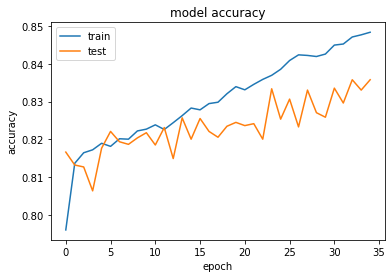

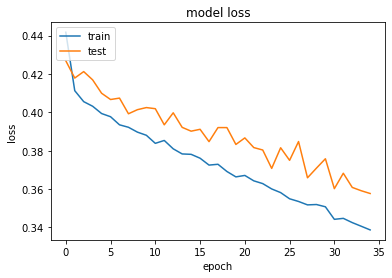

In [12]:
# list all data in history
print(training_results.history.keys())
#summarize history for accuracy
#plt.figure(figsize=(20,20))
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(training_results.history['loss'])
plt.plot(training_results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### Model Evaluation

In [13]:
results = model.evaluate(X_test, y_test, verbose=0)
print("Loss :",results[0])
print("Accuracy :",results[1])

Loss : 0.359345018863678
Accuracy : 0.8354430198669434


##### Exporting Model

In [14]:
# Save the entire model as a SavedModel.
model.save(os.getcwd().replace("\\","/")+'/saved_model/2')

INFO:tensorflow:Assets written to: C:/Users/anura/Desktop/CIS_Final_Exam-1/saved_model/2\assets
